In [225]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [379]:
PATH = 'C:\\Нейронки\\Лаб 1\\Датасет\\'
THETA = np.random.rand()
NEURONS_COUNT = 4
LETTERS = ['С', 'Т', 'Е', 'П']

images = list()

In [607]:
def image_to_np_array(img):
    return np.array(img.convert('L'), dtype='float').flatten() / 255

In [97]:
def get_images(path):
    current_images = list()

    for letter in LETTERS:
        current_path = path + letter + '\\' + letter
        current_images.append(list())
        for letter_index in range(1, 5):
            current_images[-1].append(image_to_np_array(Image.open(current_path + str(letter_index)+'.png')))

    return current_images

In [98]:
def split_datas(data):
    _train_data = list()
    _test_data = list()

    for row in data:
        _train_data.append(row[:NEURONS_COUNT-1])
        _test_data.append(row[NEURONS_COUNT-1])

    return _train_data, _test_data

In [230]:
def show_letter(data):
    plt.matshow(np.reshape(data, (32, 32)))

In [626]:
class neuron:
    def __init__(self, letter_name):
        self._letter_name = letter_name
        
        self._weights = np.random.rand(1024)
        self._previous_weights = np.ones(1024) * -1

        self._total_learning_count = 0
        self._total_succes_learning_count = 0

        self._total_test_count = 0
        self._total_success_test_count = 0


    def __str__(self):
        return self._letter_name


    def train(self, input_data) -> int:
        is_learned = True
        
        if not self._is_weights_changed():
            return not is_learned

        self._change_previous_weights()

        for letter_type_index in range(len(input_data)):
            for current_letter_index in range(len(input_data[letter_type_index])):
                is_determined_as_correct = self._get_output_signal(self._get_weighted_sum(input_data[letter_type_index][current_letter_index]))

                self._total_learning_count += 1

                if is_determined_as_correct and LETTERS[letter_type_index] != self._letter_name:
                    self._weights -= input_data[letter_type_index][current_letter_index]
                    return is_learned

                if not is_determined_as_correct and LETTERS[letter_type_index] == self._letter_name:
                    self._weights += input_data[letter_type_index][current_letter_index]
                    return is_learned

                self._total_succes_learning_count += 1

        return is_learned


    def get_learning_accuracy(self):
        if self._total_learning_count == 0:
            return 0

        return self._total_succes_learning_count / self._total_learning_count
    
    
    def get_test_accuracy(self):
        if self._total_test_count == 0:
            return 0

        return self._total_success_test_count/self._total_test_count


    def is_current_letter_inputed(self, input_data, letter):
        self._total_test_count += 1
        
        is_output_correct = self._get_output_signal(self._get_weighted_sum(input_data))
        is_correct = (is_output_correct and letter == self._letter_name) or ((not is_output_correct) and letter != self._letter_name)

        if is_correct:
            self._total_success_test_count += 1

        return is_output_correct
    

    def _change_previous_weights(self):
        self._previous_weights = np.copy(self._weights)
    

    def _get_output_signal(self, weighted_sum):
        if weighted_sum >= THETA: 
            return 1
        return 0
    

    def _get_weighted_sum(self, input_data):
        return np.sum(np.multiply(input_data, self._weights))
    

    def _is_weights_changed(self):
        return not np.array_equal(self._weights, self._previous_weights)

In [571]:
def train_neurals_with_while(neurons, data):
    is_train = True

    while is_train:
        is_train = False
        
        for neuron in neurons:
            is_train += neuron.train(data)

In [524]:
def train_neurals_with_epoch(neurons, data, epoch):
    for _ in range(epoch):
        for neuron in neurons:
            neuron.train(data)

In [525]:
def get_train_accuracy(neurons):
    return np.sum([neurons[index].get_learning_accuracy() for index in range(NEURONS_COUNT)]) / NEURONS_COUNT

In [526]:
def get_test_accuracy(neurons):
    return np.sum([neurons[index].get_test_accuracy() for index in range(NEURONS_COUNT)]) / NEURONS_COUNT

In [527]:
def get_inputed_letter(neurons, letter, data):
    letter_to_int = {"С" : 0, "Т" : 1, "Е" : 2, "П" : 3}

    result = ''
    for neuron in neurons:
        is_correct = neuron.is_current_letter_inputed(data[letter_to_int[letter]], letter)
        if is_correct:
            result = str(neuron)

    show_letter(data[letter_to_int[letter]])
    return f"Введённая буква - {result}"

In [627]:
images = get_images(PATH)

train_data, test_data = split_datas(images)

neurons = [neuron(letter) for letter in LETTERS]  

In [628]:
train_neurals_with_while(neurons, train_data)
get_train_accuracy(neurons)

0.7905224963222717

In [605]:
train_neurals_with_epoch(neurons, train_data, 100)
get_train_accuracy(neurons)

0.8240707279297884

Введённая буква - 


0.9375

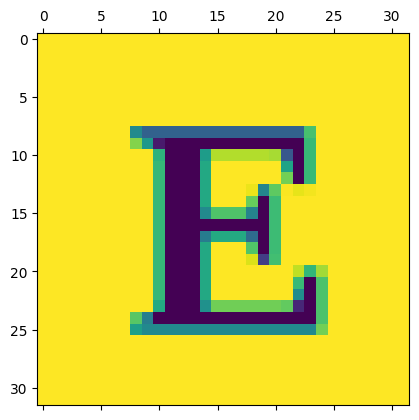

In [632]:
print(get_inputed_letter(neurons, "Е", test_data))
get_test_accuracy(neurons)